In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import statistics

pd.options.display.float_format = '{:,.2f}'.format
pd.pandas.set_option('display.max_rows', None)
pd.pandas.set_option('display.max_columns', None)
import time


In [2]:
df = pd.read_csv('../Data/imputed.csv')


####  Read the inflation adjustment Consumer Price Index for All Urban Consumers (CPI-U) file to get the CPI  for adjusting budget and gross

In [3]:
file = '../Data/SeriesReport-20240509191709_137c61.xlsx'

bls = pd.read_excel(io = file)

C:\Users\david\anaconda3\Lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [4]:
df.head(2)

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime,month,rating_imputed,budget_imputed
0,The Shining,4.00,Drama,1980,8.40,"927,000.00",Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,"19,000,000.00","46,998,772.00",Warner Bros.,146.00,June,0,0
1,The Blue Lagoon,4.00,Adventure,1980,5.80,"65,000.00",Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,"4,500,000.00","58,853,106.00",Columbia Pictures,104.00,July,0,0


### We cleaned the month (along with other variables) in the 01_Cleaning_Movies_Data workbook and exported at as clean.csv

We then took the clean file and imputed some the rating and budget and saved it as imputed.csv.

However, somehow the month data is still off when we opened imputed. So we're re-running the code to clean the month, before we adjust the budget for inflation.


In [5]:
df['month'].value_counts()

month
October      727
August       725
March        672
September    640
November     635
April        630
February     594
January      584
December     573
July         572
May          563
June         553
1985           2
1982           1
1987           1
1995           1
2019           1
2013           1
Name: count, dtype: int64

In [6]:
valid_months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

In [7]:
def convert_invalid_months(month):
    if month not in valid_months:
        return pd.NA #Convert to null value

    else:
        return month

In [8]:
df['month'] = df['month'].apply(convert_invalid_months)

In [9]:
df['month'].value_counts(dropna = False)

month
October      727
August       725
March        672
September    640
November     635
April        630
February     594
January      584
December     573
July         572
May          563
June         553
<NA>           7
Name: count, dtype: int64

In [10]:
# Checking the months with missing nulls
df[df['month'].isnull()]

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime,month,rating_imputed,budget_imputed
290,Five Days One Summer,2.00,Drama,1982,6.10,"1,000.00",Fred Zinnemann,Michael Austin,Sean Connery,United States,"15,000,000.00","199,078.00",Cable and Wireless Finance,108.00,<NA>,0,0
730,Taipei Story,6.00,Drama,1985,7.70,"2,500.00",Edward Yang,T'ien-wen Chu,Chin Tsai,Taiwan,"5,599,213.84","35,336.00",Evergreen Film Company,119.00,<NA>,0,1
743,O.C. and Stiggs,4.00,Comedy,1985,5.40,"1,200.00",Robert Altman,Tod Carroll,Daniel Jenkins,United States,"7,000,000.00","29,815.00",Metro-Goldwyn-Mayer (MGM),109.00,<NA>,0,0
1081,The House on Carroll Street,2.00,Thriller,1987,6.10,"2,300.00",Peter Yates,Walter Bernstein,Kelly McGillis,United States,"14,000,000.00","459,824.00",Orion Pictures,101.00,<NA>,0,0
2665,The White Balloon,6.00,Drama,1995,7.70,"6,900.00",Jafar Panahi,Abbas Kiarostami,Aida Mohammadkhani,Iran,"150,000.00","924,940.00",Farabi Cinema Foundation,85.00,<NA>,0,0
4017,Dahmer,4.00,Biography,2002,5.60,"9,700.00",David Jacobson,David Birke,Jeremy Renner,United States,"250,000.00","144,008.00",Blockbuster Films,101.00,<NA>,0,0
6237,Romeo and Juliet,3.00,Drama,2013,5.80,"11,000.00",Carlo Carlei,Arthur Brooke,Hailee Steinfeld,United Kingdom,"17,883,700.00","2,966,268.00",Amber Entertainment,118.00,<NA>,0,1


In [11]:
# Mapping the missing months
missing_mth_map = {
                   'Five Days One Summer' : 'November'
                   , 'Taipei Story' : 'January'
                   , 'O.C. and Stiggs' : 'July'
                   , 'The House on Carroll Street' : 'March'
                   , 'The White Balloon' : 'January'
                   , 'Dahmer' : 'January'
                   , 'Romeo and Juliet' : 'October'
              }

In [12]:
# filling in the missing months
df['month'] = df['month'].fillna(df['name'].map(missing_mth_map))

In [13]:
df['month'].value_counts(dropna = False)

month
October      728
August       725
March        673
September    640
November     636
April        630
February     594
January      587
July         573
December     573
May          563
June         553
Name: count, dtype: int64

In [14]:
df.shape

(7475, 17)

In [15]:
df.isnull().sum()

name              0
rating            0
genre             0
year              0
score             0
votes             0
director          0
writer            0
star              0
country           0
budget            0
gross             0
company           0
runtime           0
month             0
rating_imputed    0
budget_imputed    0
dtype: int64

In [16]:
df.dtypes

name               object
rating            float64
genre              object
year                int64
score             float64
votes             float64
director           object
writer             object
star               object
country            object
budget            float64
gross             float64
company            object
runtime           float64
month              object
rating_imputed      int64
budget_imputed      int64
dtype: object

In [17]:
bls.shape

(53, 15)

In [18]:
bls.head()

,Consumer Price Index for All Urban Consumers (CPI-U),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,Original Data Value,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Series Id:,CUUR0000SA0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Not Seasonally Adjusted,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Series Title:,"All items in U.S. city average, all urban cons...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
# Get all the rows since 1980
since80 = bls[11:]
since80.head()

,Consumer Price Index for All Urban Consumers (CPI-U),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
11,1980,77.80,78.90,80.10,81,81.80,82.70,82.70,83.30,84,84.80,85.50,86.30,NaN,NaN
12,1981,87,87.90,88.50,89.10,89.80,90.60,91.60,92.30,93.20,93.40,93.70,94,NaN,NaN
13,1982,94.30,94.60,94.50,94.90,95.80,97,97.50,97.70,97.90,98.20,98,97.60,NaN,NaN
14,1983,97.80,97.90,97.90,98.60,99.20,99.50,99.90,100.20,100.70,101,101.20,101.30,NaN,NaN
15,1984,101.90,102.40,102.60,103.10,103.40,103.70,104.10,104.50,105,105.30,105.30,105.30,102.90,104.90


In [20]:
type(bls)

pandas.core.frame.DataFrame

In [21]:
# Row 10 is the column names
cols = bls.iloc[10]
cols

Consumer Price Index for All Urban Consumers (CPI-U)     Year
Unnamed: 1                                                Jan
Unnamed: 2                                                Feb
Unnamed: 3                                                Mar
Unnamed: 4                                                Apr
Unnamed: 5                                                May
Unnamed: 6                                                Jun
Unnamed: 7                                                Jul
Unnamed: 8                                                Aug
Unnamed: 9                                                Sep
Unnamed: 10                                               Oct
Unnamed: 11                                               Nov
Unnamed: 12                                               Dec
Unnamed: 13                                             HALF1
Unnamed: 14                                             HALF2
Name: 10, dtype: object

In [22]:
# Get all the rows since 1980
since80 = bls[11:]
since80.head()

,Consumer Price Index for All Urban Consumers (CPI-U),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
11,1980,77.80,78.90,80.10,81,81.80,82.70,82.70,83.30,84,84.80,85.50,86.30,NaN,NaN
12,1981,87,87.90,88.50,89.10,89.80,90.60,91.60,92.30,93.20,93.40,93.70,94,NaN,NaN
13,1982,94.30,94.60,94.50,94.90,95.80,97,97.50,97.70,97.90,98.20,98,97.60,NaN,NaN
14,1983,97.80,97.90,97.90,98.60,99.20,99.50,99.90,100.20,100.70,101,101.20,101.30,NaN,NaN
15,1984,101.90,102.40,102.60,103.10,103.40,103.70,104.10,104.50,105,105.30,105.30,105.30,102.90,104.90


In [23]:
since80 = since80.rename(columns = cols)
since80.head()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,HALF1,HALF2
11,1980,77.80,78.90,80.10,81,81.80,82.70,82.70,83.30,84,84.80,85.50,86.30,NaN,NaN
12,1981,87,87.90,88.50,89.10,89.80,90.60,91.60,92.30,93.20,93.40,93.70,94,NaN,NaN
13,1982,94.30,94.60,94.50,94.90,95.80,97,97.50,97.70,97.90,98.20,98,97.60,NaN,NaN
14,1983,97.80,97.90,97.90,98.60,99.20,99.50,99.90,100.20,100.70,101,101.20,101.30,NaN,NaN
15,1984,101.90,102.40,102.60,103.10,103.40,103.70,104.10,104.50,105,105.30,105.30,105.30,102.90,104.90


In [24]:
since80 = since80.drop(columns = ['HALF1', 'HALF2'])

In [25]:
since80.head()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
11,1980,77.80,78.90,80.10,81,81.80,82.70,82.70,83.30,84,84.80,85.50,86.30
12,1981,87,87.90,88.50,89.10,89.80,90.60,91.60,92.30,93.20,93.40,93.70,94
13,1982,94.30,94.60,94.50,94.90,95.80,97,97.50,97.70,97.90,98.20,98,97.60
14,1983,97.80,97.90,97.90,98.60,99.20,99.50,99.90,100.20,100.70,101,101.20,101.30
15,1984,101.90,102.40,102.60,103.10,103.40,103.70,104.10,104.50,105,105.30,105.30,105.30


In [26]:
# Need to map month names so when we match it to the clean.csv, it can match on month and year
month_map = {'Jan' : 'January',
            'Feb' : 'February', 
            'Mar' : 'March',
            'Apr' : 'April',
            'May' : 'May', 
            'Jun' : 'June',
            'Jul' : 'July',
            'Aug' : 'August',
            'Sep' : 'September',
            'Oct' : 'October',
            'Nov' : 'November',
            'Dec' : 'December'}

In [27]:
since80.rename(mapper = month_map, axis = 1, inplace = True)

In [28]:
since80.head(1)

,Year,January,February,March,April,May,June,July,August,September,October,November,December
11,1980,77.80,78.90,80.10,81,81.80,82.70,82.70,83.30,84,84.80,85.50,86.30


In [29]:
since80.set_index('Year', inplace = True)
since80.head(3)

,January,February,March,April,May,June,July,August,September,October,November,December
Year,,,,,,,,,,,,
1980,77.80,78.90,80.10,81,81.80,82.70,82.70,83.30,84,84.80,85.50,86.30
1981,87,87.90,88.50,89.10,89.80,90.60,91.60,92.30,93.20,93.40,93.70,94
1982,94.30,94.60,94.50,94.90,95.80,97,97.50,97.70,97.90,98.20,98,97.60


In [30]:
bls_dict = since80.to_dict()

In [31]:
bls_dict

{'January': {1980: 77.8,
  1981: 87,
  1982: 94.3,
  1983: 97.8,
  1984: 101.9,
  1985: 105.5,
  1986: 109.6,
  1987: 111.2,
  1988: 115.7,
  1989: 121.1,
  1990: 127.4,
  1991: 134.6,
  1992: 138.1,
  1993: 142.6,
  1994: 146.2,
  1995: 150.3,
  1996: 154.4,
  1997: 159.1,
  1998: 161.6,
  1999: 164.3,
  2000: 168.8,
  2001: 175.1,
  2002: 177.1,
  2003: 181.7,
  2004: 185.2,
  2005: 190.7,
  2006: 198.3,
  2007: 202.416,
  2008: 211.08,
  2009: 211.143,
  2010: 216.687,
  2011: 220.223,
  2012: 226.665,
  2013: 230.28,
  2014: 233.916,
  2015: 233.707,
  2016: 236.916,
  2017: 242.839,
  2018: 247.867,
  2019: 251.712,
  2020: 257.971,
  2021: 261.582},
 'February': {1980: 78.9,
  1981: 87.9,
  1982: 94.6,
  1983: 97.9,
  1984: 102.4,
  1985: 106,
  1986: 109.3,
  1987: 111.6,
  1988: 116,
  1989: 121.6,
  1990: 128,
  1991: 134.8,
  1992: 138.6,
  1993: 143.1,
  1994: 146.7,
  1995: 150.9,
  1996: 154.9,
  1997: 159.6,
  1998: 161.9,
  1999: 164.5,
  2000: 169.8,
  2001: 175.8,
  20

In [32]:
#function to get inflation adjustment factor for each month of given year
# We are considering Decemeber 2020 as our reference month and year 

def get_inflation_adj_val(year, month):
    
    cpi_ref_year = bls_dict['December'][2020]
    cpi_base_year = bls_dict[month][year]
    
    inflation_factor = cpi_ref_year/ cpi_base_year                              
    
    return inflation_factor

In [33]:
### Just to understand how inflation adjustment factor is calculated

print(bls_dict['December'][2020]) ### Reference year
print(bls_dict['July'][2018]) ### moth, year for which we need to calculate the adj budget
print((bls_dict['December'][2020])/(bls_dict['July'][2018])) ## gives the ratio

get_inflation_adj_val(2018, 'July')

260.474
252.006
1.0336023745466378


1.0336023745466378

In [34]:
#add inf_adjmnt_value column to the dataframe by  applying get_inflation_adj_val to each row of  the data frame  
df['inf_adjmnt_value'] = df.apply(lambda x: get_inflation_adj_val(x['year'], x['month']), axis=1)

In [35]:
df[['name','year','month','inf_adjmnt_value']].head(3)

,name,year,month,inf_adjmnt_value
0,The Shining,1980,June,3.15
1,The Blue Lagoon,1980,July,3.15
2,Star Wars: Episode V - The Empire Strikes Back,1980,June,3.15


In [36]:
df['budget_adj'] = df['budget']* df['inf_adjmnt_value']
df['gross_adj'] = df['gross']* df['inf_adjmnt_value']

In [37]:
df.head(2)

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime,month,rating_imputed,budget_imputed,inf_adjmnt_value,budget_adj,gross_adj
0,The Shining,4.00,Drama,1980,8.40,"927,000.00",Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,"19,000,000.00","46,998,772.00",Warner Bros.,146.00,June,0,0,3.15,"59,842,877.87","148,028,514.36"
1,The Blue Lagoon,4.00,Adventure,1980,5.80,"65,000.00",Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,"4,500,000.00","58,853,106.00",Columbia Pictures,104.00,July,0,0,3.15,"14,173,313.18","185,365,222.88"


In [38]:
df[['name', 'budget','budget_adj', 'year', 'month', 'gross','gross_adj']].head(2)

,name,budget,budget_adj,year,month,gross,gross_adj
0,The Shining,"19,000,000.00","59,842,877.87",1980,June,"46,998,772.00","148,028,514.36"
1,The Blue Lagoon,"4,500,000.00","14,173,313.18",1980,July,"58,853,106.00","185,365,222.88"


In [39]:
### Add profit and profit_adj columns in our dataframe
df['profit'] = df['gross'] - df['budget']
df['profit_adj'] = df['gross_adj'] - df['budget_adj']

In [40]:
df.head()

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime,month,rating_imputed,budget_imputed,inf_adjmnt_value,budget_adj,gross_adj,profit,profit_adj
0,The Shining,4.00,Drama,1980,8.40,"927,000.00",Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,"19,000,000.00","46,998,772.00",Warner Bros.,146.00,June,0,0,3.15,"59,842,877.87","148,028,514.36","27,998,772.00","88,185,636.49"
1,The Blue Lagoon,4.00,Adventure,1980,5.80,"65,000.00",Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,"4,500,000.00","58,853,106.00",Columbia Pictures,104.00,July,0,0,3.15,"14,173,313.18","185,365,222.88","54,353,106.00","171,191,909.70"
2,Star Wars: Episode V - The Empire Strikes Back,2.00,Action,1980,8.70,"1,200,000.00",Irvin Kershner,Leigh Brackett,Mark Hamill,United States,"18,000,000.00","538,375,067.00",Lucasfilm,124.00,June,0,0,3.15,"56,693,252.72","1,695,679,651.77","520,375,067.00","1,638,986,399.05"
3,Airplane!,2.00,Comedy,1980,7.70,"221,000.00",Jim Abrahams,Jim Abrahams,Robert Hays,United States,"3,500,000.00","83,453,539.00",Paramount Pictures,88.00,July,0,0,3.15,"11,023,688.03","262,847,365.39","79,953,539.00","251,823,677.36"
4,Caddyshack,4.00,Comedy,1980,7.30,"108,000.00",Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,"6,000,000.00","39,846,344.00",Orion Pictures,98.00,July,0,0,3.15,"18,897,750.91","125,501,047.24","33,846,344.00","106,603,296.34"


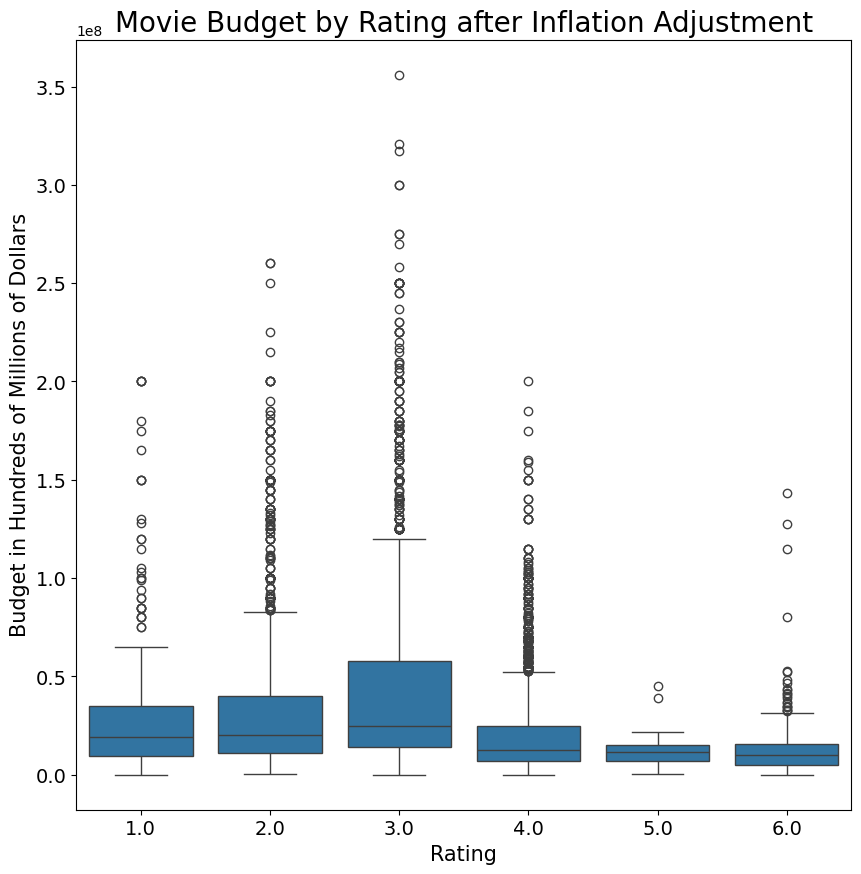

In [41]:
df_sorted = df.sort_values(by = 'rating')

plt.figure(figsize = (10,10))
sns.boxplot(data = df_sorted, x = 'rating', y = 'budget')

plt.xlabel('Rating', fontsize = 15)
plt.ylabel('Budget in Hundreds of Millions of Dollars', fontsize = 15)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.title('Movie Budget by Rating after Inflation Adjustment', fontsize = 20)

plt.savefig('../Images/movie_budget_by_rating_after_inflation_adj.png', dpi = 192)

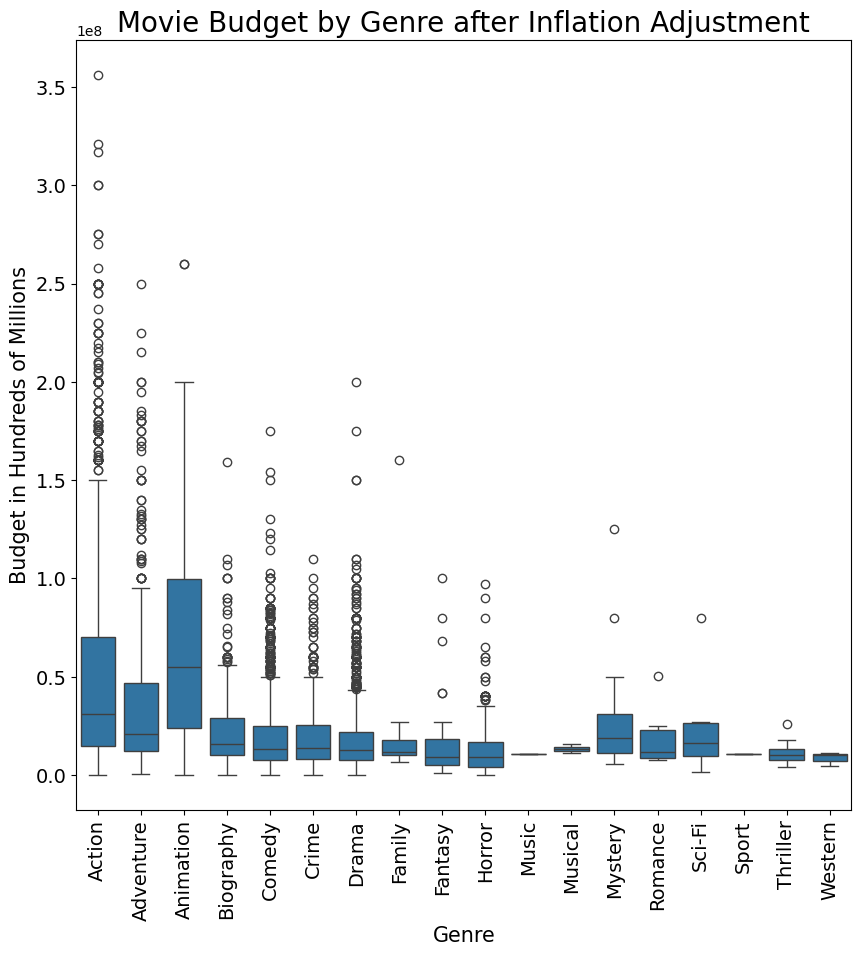

In [42]:
genre_sort = df.sort_values(by = 'genre')

plt.figure(figsize = (10,10))
sns.boxplot(data = genre_sort, x = 'genre', y = 'budget')

plt.xlabel('Genre', fontsize = 15)
plt.ylabel('Budget in Hundreds of Millions', fontsize = 15)
plt.xticks(fontsize = 14, rotation = 90)
plt.yticks(fontsize = 14)
plt.title('Movie Budget by Genre after Inflation Adjustment', fontsize = 20)

plt.savefig('../Images/movie_budget_by_genre_after_inflation_adjustment.png', dpi = 192);

In [43]:
df.to_csv('../Data/final_inflation_adj_data.csv', index = False)

In [44]:
df.head()

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime,month,rating_imputed,budget_imputed,inf_adjmnt_value,budget_adj,gross_adj,profit,profit_adj
0,The Shining,4.00,Drama,1980,8.40,"927,000.00",Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,"19,000,000.00","46,998,772.00",Warner Bros.,146.00,June,0,0,3.15,"59,842,877.87","148,028,514.36","27,998,772.00","88,185,636.49"
1,The Blue Lagoon,4.00,Adventure,1980,5.80,"65,000.00",Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,"4,500,000.00","58,853,106.00",Columbia Pictures,104.00,July,0,0,3.15,"14,173,313.18","185,365,222.88","54,353,106.00","171,191,909.70"
2,Star Wars: Episode V - The Empire Strikes Back,2.00,Action,1980,8.70,"1,200,000.00",Irvin Kershner,Leigh Brackett,Mark Hamill,United States,"18,000,000.00","538,375,067.00",Lucasfilm,124.00,June,0,0,3.15,"56,693,252.72","1,695,679,651.77","520,375,067.00","1,638,986,399.05"
3,Airplane!,2.00,Comedy,1980,7.70,"221,000.00",Jim Abrahams,Jim Abrahams,Robert Hays,United States,"3,500,000.00","83,453,539.00",Paramount Pictures,88.00,July,0,0,3.15,"11,023,688.03","262,847,365.39","79,953,539.00","251,823,677.36"
4,Caddyshack,4.00,Comedy,1980,7.30,"108,000.00",Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,"6,000,000.00","39,846,344.00",Orion Pictures,98.00,July,0,0,3.15,"18,897,750.91","125,501,047.24","33,846,344.00","106,603,296.34"


In [49]:
post07 = df[df['year'] >= 2007]
post07 = post07[post07['year'] < 2020]

In [50]:
post07.head()

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime,month,rating_imputed,budget_imputed,inf_adjmnt_value,budget_adj,gross_adj,profit,profit_adj
4872,There Will Be Blood,4.00,Drama,2007,8.20,"535,000.00",Paul Thomas Anderson,Paul Thomas Anderson,Daniel Day-Lewis,United States,"25,000,000.00","76,182,388.00",Paramount Vantage,158.00,January,0,0,1.29,"32,170,628.80","98,033,413.03","51,182,388.00","65,862,784.23"
4873,No Country for Old Men,4.00,Crime,2007,8.10,"886,000.00",Ethan Coen,Joel Coen,Tommy Lee Jones,United States,"25,000,000.00","171,627,166.00",Paramount Vantage,122.00,November,0,0,1.24,"30,982,695.54","212,698,889.21","146,627,166.00","181,716,193.67"
4874,Stardust,3.00,Adventure,2007,7.60,"260,000.00",Matthew Vaughn,Jane Goldman,Charlie Cox,United Kingdom,"70,000,000.00","137,515,140.00",Paramount Pictures,127.00,August,0,0,1.25,"87,694,512.71","172,276,045.62","67,515,140.00","84,581,532.90"
4875,Gone Baby Gone,4.00,Crime,2007,7.60,"258,000.00",Ben Affleck,Ben Affleck,Morgan Freeman,United States,"19,000,000.00","34,612,443.00",Miramax,114.00,October,0,0,1.25,"23,686,707.89","43,150,254.04","15,612,443.00","19,463,546.15"
4876,Disturbia,3.00,Crime,2007,6.80,"226,000.00",D.J. Caruso,Christopher Landon,Shia LaBeouf,United States,"20,000,000.00","118,114,220.00",Dreamworks Pictures,105.00,April,0,0,1.26,"25,204,803.42","148,852,284.82","98,114,220.00","123,647,481.40"


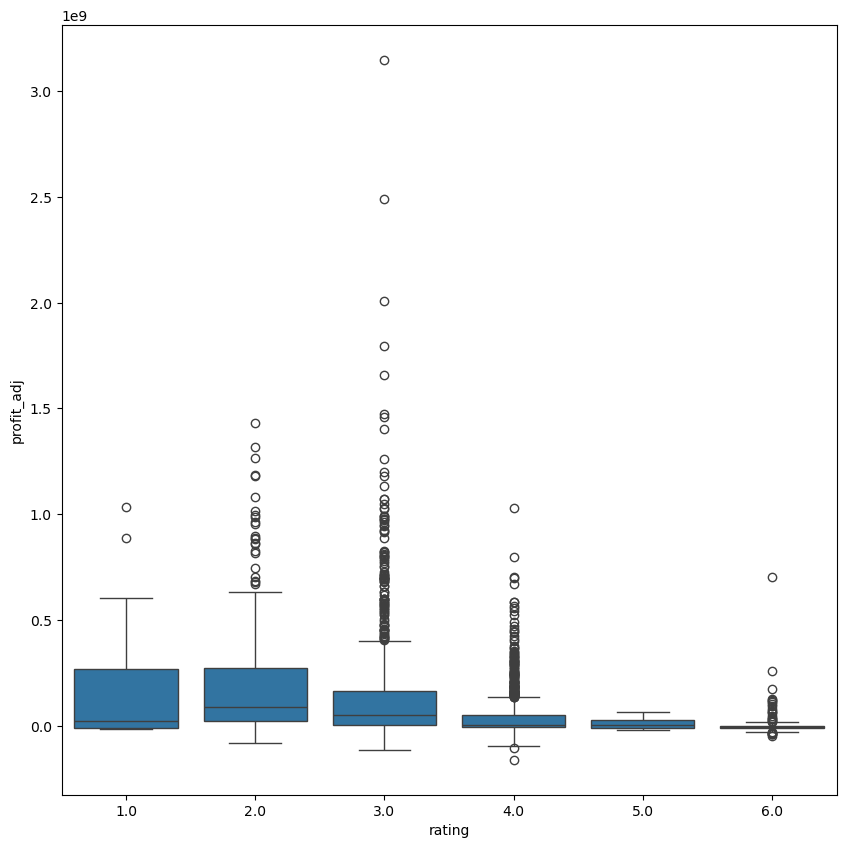

In [54]:
plt.figure(figsize = (10,10))
sns.boxplot(data = post07, x = 'rating', y = 'profit_adj');

In [55]:
post07.head()

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime,month,rating_imputed,budget_imputed,inf_adjmnt_value,budget_adj,gross_adj,profit,profit_adj
4872,There Will Be Blood,4.00,Drama,2007,8.20,"535,000.00",Paul Thomas Anderson,Paul Thomas Anderson,Daniel Day-Lewis,United States,"25,000,000.00","76,182,388.00",Paramount Vantage,158.00,January,0,0,1.29,"32,170,628.80","98,033,413.03","51,182,388.00","65,862,784.23"
4873,No Country for Old Men,4.00,Crime,2007,8.10,"886,000.00",Ethan Coen,Joel Coen,Tommy Lee Jones,United States,"25,000,000.00","171,627,166.00",Paramount Vantage,122.00,November,0,0,1.24,"30,982,695.54","212,698,889.21","146,627,166.00","181,716,193.67"
4874,Stardust,3.00,Adventure,2007,7.60,"260,000.00",Matthew Vaughn,Jane Goldman,Charlie Cox,United Kingdom,"70,000,000.00","137,515,140.00",Paramount Pictures,127.00,August,0,0,1.25,"87,694,512.71","172,276,045.62","67,515,140.00","84,581,532.90"
4875,Gone Baby Gone,4.00,Crime,2007,7.60,"258,000.00",Ben Affleck,Ben Affleck,Morgan Freeman,United States,"19,000,000.00","34,612,443.00",Miramax,114.00,October,0,0,1.25,"23,686,707.89","43,150,254.04","15,612,443.00","19,463,546.15"
4876,Disturbia,3.00,Crime,2007,6.80,"226,000.00",D.J. Caruso,Christopher Landon,Shia LaBeouf,United States,"20,000,000.00","118,114,220.00",Dreamworks Pictures,105.00,April,0,0,1.26,"25,204,803.42","148,852,284.82","98,114,220.00","123,647,481.40"


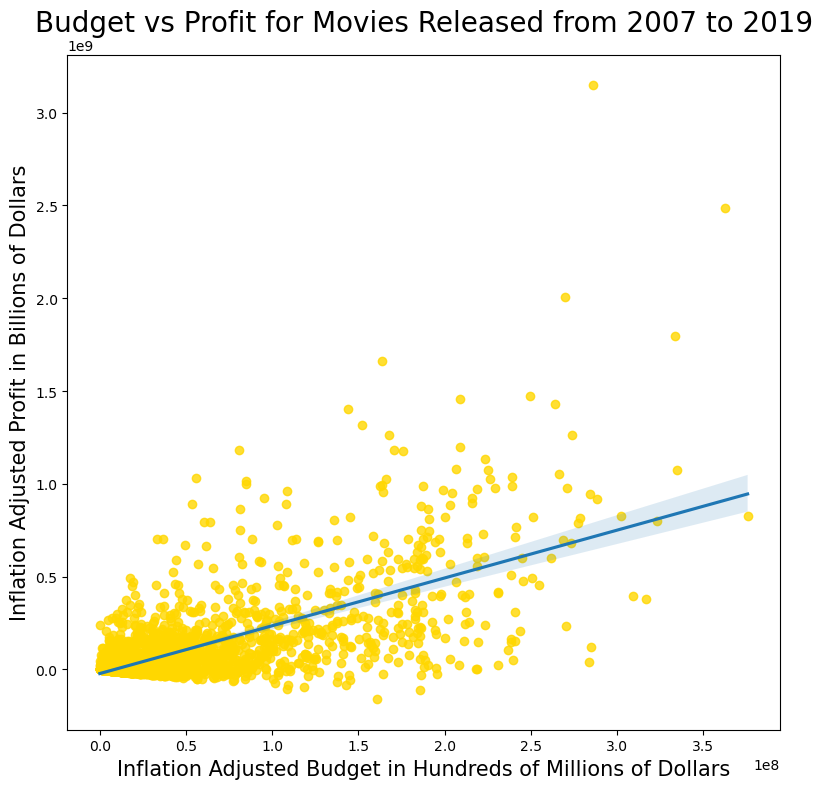

In [76]:
plt.figure(figsize = (8,8))

sns.regplot(data = post07, x = 'budget_adj', y = 'profit_adj', scatter_kws = {'color' : 'gold'})

plt.title('Budget vs Profit for Movies Released from 2007 to 2019', fontsize = 20)

plt.xlabel('Inflation Adjusted Budget in Hundreds of Millions of Dollars', fontsize = 15)
plt.ylabel('Inflation Adjusted Profit in Billions of Dollars', fontsize = 15)

plt.tight_layout()

plt.savefig('../Images/budget_v_revenue.png', dpi = 192);
                